In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 불러오기
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/TITANIC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/TITANIC/data/test.csv')

submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DACON/TITANIC/data/sample_submission.csv')




*   PassengerId : 탑승객의 고유 아이디
*   Survival : 생존여부(0: 사망, 1: 생존)
*   Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
*   Name : 이름
*   Sex : 성별
*   Age : 나이
*   Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
*   Parch: 함께 탑승한 부모, 자식의 수
*   Ticket: 티켓번호
*   Fare: 티켓의 요금
*   Cabin: 객실번호
*   Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)



In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# ** 데이터 전처리**

In [ ]:
test['Fare']=test['Fare'].fillna(27.079812)


In [ ]:
#최빈값으로 채움
train['Embarked']=train['Embarked'].fillna('S')

In [ ]:
#평균값으로 채움
train['Age']=train['Age'].fillna(28)
test['Age']=test['Age'].fillna(27)

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train = pd.get_dummies(data = train, columns = ['Embarked'], prefix = 'Embarked')
test = pd.get_dummies(data = test, columns = ['Embarked'], prefix = 'Embarked')

train = pd.get_dummies(data = train, columns = ['Sex'], prefix = 'Sex')
test = pd.get_dummies(data = test, columns = ['Sex'], prefix = 'Sex')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [ ]:
train['Title']=train['Name'].str.extract('([\w]+)\.', expand=False)
test['Title']=test['Name'].str.extract('([\w]+)\.', expand=False)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,Mr


In [ ]:
train['Title'] = train['Title'].apply(lambda x: "Else" if x not in ("Mr" , "Miss" ,"Mrs" , "Master") else x )
test['Title'] = test['Title'].apply(lambda x: "Else" if x not in ("Mr" , "Miss" ,"Mrs" , "Master") else x )

In [ ]:
np.unique(train.Title) , np.unique(test.Title)

(array(['Else', 'Master', 'Miss', 'Mr', 'Mrs'], dtype=object),
 array(['Else', 'Master', 'Miss', 'Mr', 'Mrs'], dtype=object))

In [ ]:
train = pd.get_dummies(data = train, columns = ['Title'], prefix = 'Title')
test = pd.get_dummies(data = test, columns = ['Title'], prefix = 'Title')

In [ ]:
train['Family'] = train['SibSp'] +  train['Parch'] 
test['Family'] = test['SibSp'] +  test['Parch'] 

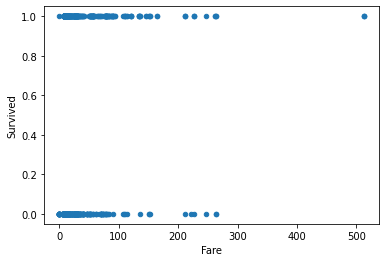

In [ ]:
train.plot( x= 'Fare',y='Survived' , kind='scatter')

## **변수 선택 및 모델 구축**





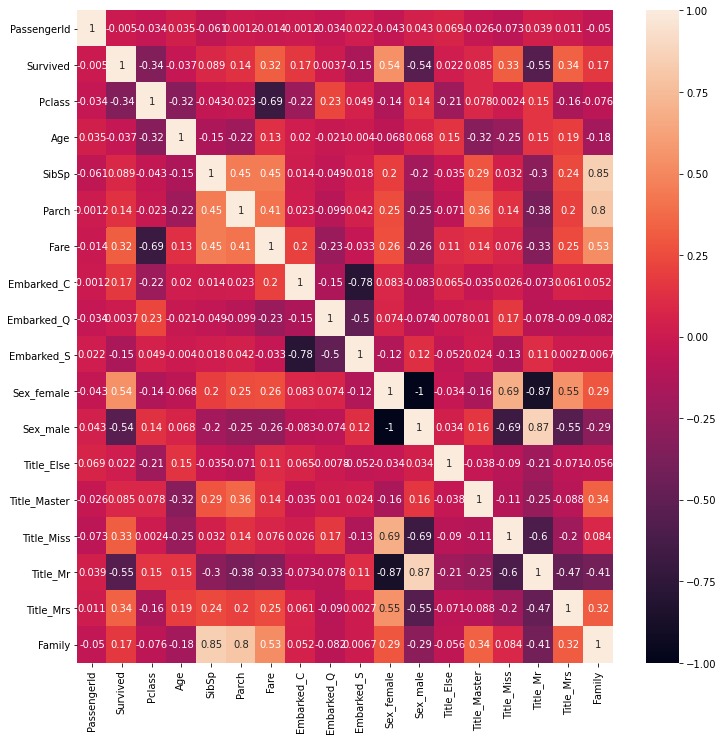

In [ ]:
# 상관계수를 직관적으로 보기위해 시각화
import seaborn as sns
import matplotlib.pyplot as plt
#annot cell 값 표기여부 옵션
plt.figure(figsize=(12, 12))
sns.heatmap(train.corr(method='spearman'), annot=True)

In [ ]:
features = ['Sex_male','Sex_female','Embarked_S','Embarked_C','Embarked_Q','Fare','Title_Mrs','Title_Mr','Title_Miss','Title_Master','Title_Else','Family']
target = ['Survived']

In [ ]:
X_train = train[features]
y_train  = train[target]

X_test = test[features]

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
k_fold = KFold(n_splits=5,shuffle=True, random_state=99)

In [ ]:
# 하이퍼파라미터 (커널스케일, 박스컨스트레인트 등 모델파라미터를 의미) 의 최적값을 찾음
from sklearn.model_selection import GridSearchCV

# ***LogisticRegression***

In [ ]:
model = LogisticRegression(random_state=99 )
#learning_rate: 기존모델의 성능을 다음 모델에 얼만큼 영향을 줄것인지 가중치. 값이 적을수록 미세한영향
#min_child_samples : 최종 결정 클래스인 Leaf Node가 되기 위해서 최소한으로 필요한 데이터 개체의 수
params = { 
    'max_iter' : [300,500,1000,10000,50000,100000],
    'solver' : ['newton-cg','lgfgs','liblinear','sag','saga'],
    'C' : [0.01,0.1,1,10,100,1000]
    }
# 대회에서는 MSE 가 평가지표이므로 scoring 을 neg_mean_squared_error 로 설정
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring = 'neg_mean_squared_error',
                  cv=k_fold) # 일반적으로 kfold를 사용하고 cv=5 해도 동일


In [ ]:
gs.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=99, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [300, 500, 1000, 10000, 50000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
gs.best_params_

{'C': 1, 'max_iter': 300}

In [ ]:
model=LogisticRegression(random_state=99, C=1, max_iter = 300 )
model.fit(X_train,y_train.values.ravel())
model.score(X_train,y_train)
#0.8024691358024691
#0.8305274971941639

0.8294051627384961

In [ ]:
lrTitanic = submission.copy()
lrTitanic['Survived'] = model.predict_proba(X_test)
lrTitanic['Survived'] = 1-lrTitanic['Survived']
lrTitanic['Survived']

0      0.114855
1      0.760694
2      0.117712
3      0.135779
4      0.675377
         ...   
413    0.134707
414    0.949496
415    0.133318
416    0.134707
417    0.771224
Name: Survived, Length: 418, dtype: float64

In [ ]:
lrTitanic.to_csv('lr_1_300_0811.csv',index=False)

# ***SVC***

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC(random_state=123,probability=True )

params = { 
    
    'max_iter' : [400000000,50000000,60000000,700000000],
    'kernel' : ['rbf','poly','linear'],
    #'gamma' :[0.01,0.1,1,10] ,
    'C' : [0.01,0.1,1,10]
    }
# 대회에서는 RMSE 가 평가지표이므로 scoring 을 neg_mean_squared_error 로 설정
gs = GridSearchCV(estimator=model_svc,
                  param_grid=params,
                  scoring = 'roc_auc',
                  cv=k_fold) # 일반적으로 kfold를 사용하고 cv=5 해도 동일


In [ ]:
gs.fit(X_train,y_train.values.ravel()) 

In [ ]:
gs.best_params_

In [ ]:
model_svc = SVC(random_state=123,C= 10,  kernel= 'rbf', max_iter= 60000000, probability=True)
model_svc.fit(X_train,y_train.values.ravel())
model_svc.score(X_train,y_train)
#0.8047138047138047

In [ ]:
svcTitanic = submission.copy()
svcTitanic['Survived'] = model_svc.predict_proba(X_test)
svcTitanic['Survived'] = 1-svcTitanic['Survived']
svcTitanic['Survived']

In [ ]:
svcTitanic.to_csv('svc_10_60000000_0802.csv',index=False)

# ***GradientBoostingClassifier***



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_gbrt = GradientBoostingClassifier(random_state=123 )

params = { 
    
    'n_estimators' : [100,500,1000],
    'min_samples_leaf' : [2,3,5],
    'min_samples_split' : [2,3,5],
    'learning_rate' : [0.01,0.1,1],
    'max_depth' : [2,3,5]
    } 
gs = GridSearchCV(estimator=model_gbrt,
                  param_grid=params,
                  scoring = 'accuracy',
                  cv=k_fold) # 일반적으로 kfold를 사용하고 cv=5 해도 동일


In [ ]:
gs.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=3, random_state=123, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_...
                                                  random_state=123,
                                    

In [ ]:
gs.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
model_gbrt = GradientBoostingClassifier(random_state=123, learning_rate= 0.01, min_samples_leaf = 5, min_samples_split = 2, n_estimators= 1000,max_depth = 5 )
model_gbrt.fit(X_train,y_train.values.ravel())
model_gbrt.score(X_train,y_train)

0.9337822671156004

In [ ]:
gbrtTitanic = submission.copy()
gbrtTitanic['Survived'] = model_gbrt.predict_proba(X_test)
gbrtTitanic['Survived'] = 1-gbrtTitanic['Survived']
gbrtTitanic['Survived']

In [ ]:

gbrtTitanic.to_csv('gbrt_0.01_5_2_1000_5_0811.csv',index=False)

# ***xgboost***





In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBClassifier( random_state=123,metric= 'auc',eval_metric = 'auc')
#learning_rate: 기존모델의 성능을 다음 모델에 얼만큼 영향을 줄것인지 가중치. 값이 적을수록 미세한영향
#min_child_samples : 최종 결정 클래스인 Leaf Node가 되기 위해서 최소한으로 필요한 데이터 개체의 수
params = { 
    'learning_rate' : [0.01,0.1,1,10],
    'n_estimators' : [100,500,1000,2000] ,
    'max_depth' : [3,5,7,10] 
    }
# 대회에서는 RMSE 가 평가지표이므로 scoring 을 neg_mean_squared_error 로 설정
gs = GridSearchCV(estimator=model_xgb,
                  param_grid=params,
                  scoring = 'roc_auc',
                  cv=k_fold) # 일반적으로 kfold를 사용하고 cv=5 해도 동일


In [ ]:
gs.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=3, random_state=123, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='auc',
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     metric='auc', min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None...ive='binary:logistic',
                                     random_state=123, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=None,
            

In [ ]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [ ]:
import numpy as np
model=xgb.XGBClassifier(random_state=123,n_estimators=500,learning_rate= 0.1,max_depth = 3  ,metric= 'auc',eval_metric = 'auc')

models = []

# iloc : index로 접근 X_train.iloc[train_idx] : X_train의 train_idx 값에 해당하는 행
for train_idx,val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]
  
  #eval_set : 검증용 set ,early_stopping_rounds : 과적합을 막기위해 어느단계에서 멈출지, n_estimators 만큼 반복하는데 early_stopping_rounds 만큼 성능의 증가(오차율감소)가 없다면 멈춤
  # verbose= 해당숫자만큼 진행했을때 진행과정 출력
  models.append(model.fit(x_t,(y_t.values.ravel()),eval_set=[(x_val,y_val.values.ravel())],early_stopping_rounds=1000,verbose=100))
  print(model.score(X_train,y_train))

[0]	validation_0-auc:0.869257
Will train until validation_0-auc hasn't improved in 1000 rounds.
[100]	validation_0-auc:0.887621
[200]	validation_0-auc:0.88779
[300]	validation_0-auc:0.890709
[400]	validation_0-auc:0.889406
[499]	validation_0-auc:0.888272
0.8585858585858586
[0]	validation_0-auc:0.787058
Will train until validation_0-auc hasn't improved in 1000 rounds.
[100]	validation_0-auc:0.830623
[200]	validation_0-auc:0.832049
[300]	validation_0-auc:0.835677
[400]	validation_0-auc:0.840031
[499]	validation_0-auc:0.844085
0.9068462401795735
[0]	validation_0-auc:0.871792
Will train until validation_0-auc hasn't improved in 1000 rounds.
[100]	validation_0-auc:0.874896
[200]	validation_0-auc:0.871515
[300]	validation_0-auc:0.875452
[400]	validation_0-auc:0.873645
[499]	validation_0-auc:0.872256
0.8361391694725028


In [ ]:
preds = []
for model in models:
  preds.append(model.predict_proba(X_test))
  print(preds)

In [ ]:
xgbTitanic = submission.copy()
xgbTitanic['Survived'] = np.mean((preds),axis=0)[:,1]
xgbTitanic['Survived']

0      0.171749
1      0.530950
2      0.178988
3      0.178988
4      0.657299
         ...   
413    0.178988
414    0.859093
415    0.171749
416    0.178988
417    0.736128
Name: Survived, Length: 418, dtype: float32

In [ ]:

xgbTitanic.to_csv('xgb_500_0.1_3_0716.csv',index=False)

## **모델 학습 및 검증**

